In [2]:
import pandas as pd
pd.options.display.float_format = "{:.2f}".format
import seaborn as sns
import matplotlib as mpl
mpl.rc("font", family="Malgun Gothic")

In [3]:
df1 = pd.read_csv("03_Delivery.csv", encoding="cp949")

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46749 entries, 0 to 46748
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   결제수단    46749 non-null  object 
 1   배송번호    46749 non-null  object 
 2   배송시작일   46749 non-null  object 
 3   배송완료일   46749 non-null  object 
 4   상품구매금액  46749 non-null  int64  
 5   상품번호    46661 non-null  float64
 6   수량      46749 non-null  int64  
 7   주문경로    46749 non-null  object 
 8   주문일     46749 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [5]:
df1["주문일"][0]

20181227

주중 vs 주말 비교
- 판매 수량: 주중 > 주말
- 주문 당 상품구매금액의 평균: 비슷하다
- 총 매출액: 주중 > 주말 (barplot)

주문 경로에 따른 매출 총액 비교: 주중 > 주말


In [6]:
# transform
df1["주문일(datetime)"] = pd.to_datetime(df1["주문일"], format="%Y%m%d")
df1["주문요일"] = df1["주문일(datetime)"].dt.day_name()
df1["주중/주말"] = df1["주문요일"].replace({'Thursday': "주중", 'Saturday': "주말", 'Sunday': "주말", 'Monday': "주중", 'Tuesday': "주중", 'Wednesday': "주중",
       'Friday': "주중"})

In [7]:
df1.head(1)

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일,주문일(datetime),주문요일,주중/주말
0,무통장입금,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,71450,1077.00,1,PC쇼핑몰,20181227,2018-12-27,Thursday,주중


In [8]:
# 1주일 중 5일이 주중, 2일이 주말이다.
# 차이가 1주일 중 주중 5일, 주말 2일이라는 점에 의한 차이일 수 있다.
df1["주중/주말"].value_counts()

주중    42406
주말     4343
Name: 주중/주말, dtype: int64

In [9]:
# 매출액(상품구매금액의 총합) 비교: 주중  < 주말
df1.pivot_table(index="주중/주말", values="상품구매금액", aggfunc="sum")

,상품구매금액
주중/주말,
주말,306863800
주중,2936027585


<Axes: xlabel='주중/주말', ylabel='상품구매금액'>

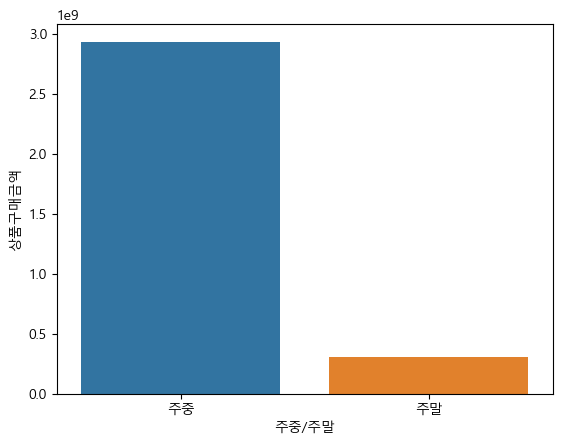

In [10]:
sns.barplot(data=df1, x="주중/주말", y="상품구매금액", estimator=sum, errorbar=None)

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46749 entries, 0 to 46748
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   결제수단           46749 non-null  object         
 1   배송번호           46749 non-null  object         
 2   배송시작일          46749 non-null  object         
 3   배송완료일          46749 non-null  object         
 4   상품구매금액         46749 non-null  int64          
 5   상품번호           46661 non-null  float64        
 6   수량             46749 non-null  int64          
 7   주문경로           46749 non-null  object         
 8   주문일            46749 non-null  int64          
 9   주문일(datetime)  46749 non-null  datetime64[ns] 
 10  주문요일           46749 non-null  object         
 11  주중/주말          46749 non-null  object         
 12  배송시작일(date)    46749 non-null  datetime64[ns] 
 13  배송완료일(date)    46749 non-null  datetime64[ns] 
 14  배송기간           46749 non-null  timedelta64[ns]
dtypes:

<Axes: xlabel='주중/주말', ylabel='상품구매금액'>

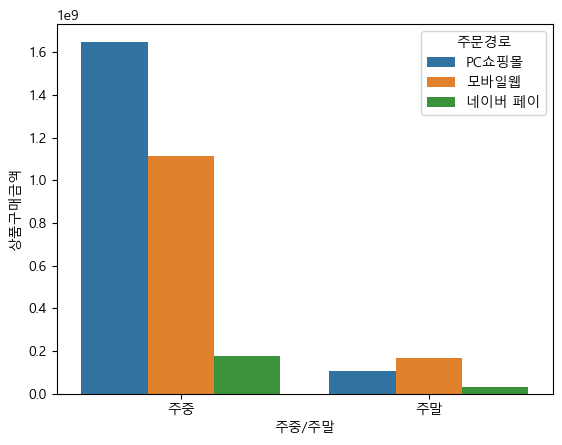

In [18]:
sns.barplot(data=df1, x="주중/주말", y="상품구매금액", hue="주문경로", estimator="sum", errorbar=None)

In [11]:
# 주문 당 상품구매금액의 평균값 비교: 비슷하다.
df1.pivot_table(index="주중/주말", values="상품구매금액", aggfunc="mean")

,상품구매금액
주중/주말,
주말,70657.10
주중,69236.14


배송기간


In [12]:
def func1(row):
    return row.split(' ')[0]
df1["배송시작일(date)"] = pd.to_datetime(df1["배송시작일"].apply(func1), format="%Y-%m-%d")
df1["배송완료일(date)"] = pd.to_datetime(df1["배송완료일"].apply(func1), format="%Y-%m-%d")

In [13]:
df1.head(1)

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일,주문일(datetime),주문요일,주중/주말,배송시작일(date),배송완료일(date)
0,무통장입금,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,71450,1077.00,1,PC쇼핑몰,20181227,2018-12-27,Thursday,주중,2019-01-07,2019-01-11


timedelta
- 시간의 차이를 계산
- describe 사용 가능

- 배송기간이 4일이 아닌 주문데이터 filtering
- 배송기간이 7일 이상인 주문 데이터 filtering

In [14]:
# timedelta
df1["배송기간"] = df1["배송완료일(date)"] - df1["배송시작일(date)"]
df1.describe()

,상품구매금액,상품번호,수량,주문일,배송기간
count,46749.00,46661.00,46749.00,46749.00,46749
mean,69368.14,891.68,1.18,20184044.49,4 days 04:38:57.008278251
std,66112.47,11339.53,0.68,5192.40,1 days 04:56:12.144368428
min,0.00,38.00,-1.00,20170101.00,0 days 00:00:00
25%,32880.00,378.00,1.00,20180727.00,4 days 00:00:00
50%,67780.00,928.00,1.00,20181118.00,4 days 00:00:00
75%,92130.00,1209.00,1.00,20190225.00,4 days 00:00:00
max,4963400.00,999999.00,50.00,20190619.00,47 days 00:00:00


In [15]:
cond1 = (df1["배송기간"] != pd.Timedelta(days=4))
df1.loc[cond1]

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일,주문일(datetime),주문요일,주중/주말,배송시작일(date),배송완료일(date),배송기간
41,카드,D-20190101-0000055-01,2019-01-03 오전 9:32,2019-01-09 오후 3:47,42350,1283.00,1,네이버 페이,20190101,2019-01-01,Tuesday,주중,2019-01-03,2019-01-09,6 days
47,적립금,D-20190101-0000106-01,2019-01-03 오전 9:30,2019-01-13 오전 7:19,68970,38.00,1,네이버 페이,20190101,2019-01-01,Tuesday,주중,2019-01-03,2019-01-13,10 days
58,휴대폰,D-20190101-0000153-01,2019-01-03 오전 9:30,2019-01-03 오후 11:15,41910,1350.00,1,네이버 페이,20190101,2019-01-01,Tuesday,주중,2019-01-03,2019-01-03,0 days
59,휴대폰,D-20190101-0000153-02,2019-01-03 오전 9:30,2019-01-03 오후 11:15,87120,1233.00,1,네이버 페이,20190101,2019-01-01,Tuesday,주중,2019-01-03,2019-01-03,0 days
60,휴대폰,D-20190101-0000153-03,2019-01-03 오전 9:30,2019-01-03 오후 11:15,99660,1235.00,1,네이버 페이,20190101,2019-01-01,Tuesday,주중,2019-01-03,2019-01-03,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46739,카드,D-20171228-0000132-03,2017-12-29 오후 4:34,2018-01-03 오전 9:20,47300,248.00,1,네이버 페이,20171228,2017-12-28,Thursday,주중,2017-12-29,2018-01-03,5 days
46740,카드,D-20171228-0000132-04,2017-12-29 오후 4:34,2018-01-07 오전 4:55,69960,293.00,1,네이버 페이,20171228,2017-12-28,Thursday,주중,2017-12-29,2018-01-07,9 days
46741,카드,D-20171228-0000132-05,2017-12-29 오후 4:34,2018-01-07 오전 4:55,63140,305.00,1,네이버 페이,20171228,2017-12-28,Thursday,주중,2017-12-29,2018-01-07,9 days
46746,카드,D-20171230-0000022-01,2018-01-02 오후 7:06,2018-01-11 오전 2:46,36000,140.00,1,네이버 페이,20171230,2017-12-30,Saturday,주말,2018-01-02,2018-01-11,9 days


In [23]:
cond1 = (df1["배송기간"] > pd.Timedelta(days=7))
df1.loc[cond1]

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일,주문일(datetime),주문요일,주중/주말,배송시작일(date),배송완료일(date),배송기간
47,적립금,D-20190101-0000106-01,2019-01-03 오전 9:30,2019-01-13 오전 7:19,68970,38.00,1,네이버 페이,20190101,2019-01-01,Tuesday,주중,2019-01-03,2019-01-13,10 days
132,카드,D-20190102-0000463-01,2019-01-03 오후 6:20,2019-01-28 오후 4:33,388080,1217.00,3,네이버 페이,20190102,2019-01-02,Wednesday,주중,2019-01-03,2019-01-28,25 days
134,카드,D-20190102-0000498-01,2019-01-03 오후 6:20,2019-01-28 오후 4:15,129360,1217.00,1,네이버 페이,20190102,2019-01-02,Wednesday,주중,2019-01-03,2019-01-28,25 days
193,카드,D-20190102-0000938-01,2019-01-03 오후 6:20,2019-01-13 오전 4:38,82170,380.00,1,네이버 페이,20190102,2019-01-02,Wednesday,주중,2019-01-03,2019-01-13,10 days
194,카드,D-20190102-0000938-02,2019-01-03 오후 6:20,2019-01-13 오전 4:38,77220,379.00,1,네이버 페이,20190102,2019-01-02,Wednesday,주중,2019-01-03,2019-01-13,10 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46719,무통장입금,D-20171227-0000106-01,2017-12-28 오후 5:54,2018-01-06 오전 1:18,104000,68.00,1,네이버 페이,20171227,2017-12-27,Wednesday,주중,2017-12-28,2018-01-06,9 days
46737,카드,D-20171228-0000132-01,2017-12-29 오후 4:34,2018-01-07 오전 4:55,74000,483.00,1,네이버 페이,20171228,2017-12-28,Thursday,주중,2017-12-29,2018-01-07,9 days
46740,카드,D-20171228-0000132-04,2017-12-29 오후 4:34,2018-01-07 오전 4:55,69960,293.00,1,네이버 페이,20171228,2017-12-28,Thursday,주중,2017-12-29,2018-01-07,9 days
46741,카드,D-20171228-0000132-05,2017-12-29 오후 4:34,2018-01-07 오전 4:55,63140,305.00,1,네이버 페이,20171228,2017-12-28,Thursday,주중,2017-12-29,2018-01-07,9 days
